# Vehicle Delivery Problem

Vans or Lorries can be used to deliver stocked to a number of stores from depots. Vans can resupply up to 5 stores per trip at a cost of 1 unit per mile, Lorries can resupply up to 14 stores per trip at a cost of 4 units per mile.

There are 2 depots and 23 stores in the given dataset

In [1]:
# Importing libraries

import sys, math, random, heapq
import matplotlib.pyplot as plt
from itertools import chain
import random as rnd
import copy
import numpy as np
from operator import itemgetter
import time

In [2]:
# Supplied coordiate list for stores and warehouses 

master_coordinates = [(82.4092152588648,2.41722176566145),
(52.0107401170696,74.7835775016353),
(80.1268870253223,41.1644566088967),
(19.5734598101777,35.3883060723996),
(91.0907760261775,5.72555239363766),
(42.3517865361369,38.3218940655252),
(61.6534667863024,90.29363330745),
(32.8611327051887,48.3235547277621),
(66.3856395412843,28.9612782644831),
(50.4461953984636,3.87037470511021),
(35.7225796523672,55.58110740694),
(14.2765445340578,61.8076122416905),
(76.2660882972845,8.50257833860379),
(8.54457053030228,70.3203376157825),
(55.4129913618185,50.0973516685565),
(57.4446555802762,37.733279345801),
(89.3867468418215,25.1643750474621),
(88.1273603929195,10.1569591693043),
(59.0896168354567,24.9906348847562),
(38.5969971792206,16.9021101400882),
(4.70146794077424,34.7889852375512),
(26.9614325437099,47.4343165149328),
(21.0434299897172,14.473538158137),
(73.718240923925,51.1000119146014),
(18.3466309305945,70.2602187559879),
]

In [3]:
# Depots are last two coordinates in master list, stores are the others

depot_coordinates = master_coordinates[23:25]
store_coordinates = master_coordinates[0:23]

# First Pass

In [4]:
# Set-up cost measures. Ignoring differing vehicle costs and capacity just now

In [5]:
def dist_calc(a,b):
    '''Calculates the distance between two (x,y) coordinates'''
    x1 = a[0]
    x2 = b[0]
    y1 = a[1]
    y2 = b[1]
    dist = ((x1-x2)**2+(y1-y2)**2)**0.5
    return dist

In [6]:
def route_dist(stores, depot):
    '''Calculates the distance of a delivery route by calculating the distance from a distribution centre, to
    each delivery location, and back'''

    w = depot+stores
    
    dist = sum([dist_calc(w[s],w[s-1]) for s in range(len(w))])


    return dist

In [7]:
# set up an initial fleet of vehicles
vehicles = {}

for n in range(len(store_coordinates)):
    vehicles[n] = {'stores':[store_coordinates[n]]}

for n in vehicles:
    if route_dist(vehicles[n]['stores'],[depot_coordinates[0]]) < route_dist(vehicles[n]['stores'],[depot_coordinates[1]]):
        vehicles[n]['depot'] = [depot_coordinates[0]]
    else:
        vehicles[n]['depot'] = [depot_coordinates[1]]

In [8]:
# to reduce used vehicles to minimise distance


run = []
dist = []

for k in range(200):
    start = sum([route_dist(vehicles[v]['stores'], vehicles[v]['depot']) for v in vehicles])
    # 1. pick a vehicle at random:
    veh = random.choice(list(vehicles.keys()))

    # 2. calculate distance travelled by chosen vehicle: 
    # maybe not needed
    d1 = route_dist(vehicles[veh]['stores'], vehicles[veh]['depot'])

    # 3. pick a visted store at random:
    store_index = random.randrange(len(vehicles[veh]['stores']))
    tested_store = vehicles[veh]['stores'].pop(store_index) 
    
    # 3.5 check what'll cost to just add that store back into place
    d2 = route_dist(vehicles[veh]['stores'], vehicles[veh]['depot'])
    dd = d1-d2

    # 4. Add empty vehicles for consideration:
    vehicles['a'] = {'stores':[], 'depot':[depot_coordinates[0]]}
    vehicles['b'] = {'stores':[], 'depot':[depot_coordinates[1]]}

    # 5. test other locations:
    best_cost = dd
    best_v = veh
    best_i = store_index

    for v in vehicles:
        for i in range(len(vehicles[v]['stores'])+1):
            ephemeral = vehicles[v]['stores'].copy()
            ephemeral.insert(i,tested_store)
            rc = route_dist(ephemeral, vehicles[v]['depot'])-route_dist(vehicles[v]['stores'], vehicles[v]['depot'])
            if rc < best_cost:
                best_cost = rc
                best_v = v
                best_i = i
                
    # 6. put store in best location:
    vehicles[best_v]['stores'].insert(best_i,tested_store)

    # 7. delete vehicles which visit no stores:
    tbd = [v for v in vehicles if len(vehicles[v]['stores']) == 0]

    for v in tbd:
        del vehicles[v]
    
    # 8.
    run.append(k)
    dist.append(sum([route_dist(vehicles[v]['stores'], vehicles[v]['depot']) for v in vehicles]))
   # print(k, sum([route_dist(vehicles[v]['stores'], vehicles[v]['depot']) for v in vehicles]))
                
#     end = sum([route_dist(vehicles[v]['stores'], vehicles[v]['depot']) for v in vehicles])
#     if start-end < 0:
#         print(vehicles, '\n', veh, store_index, tested_store, best_v, best_i, start, end)
                
                
    
    

# display(vehicles)

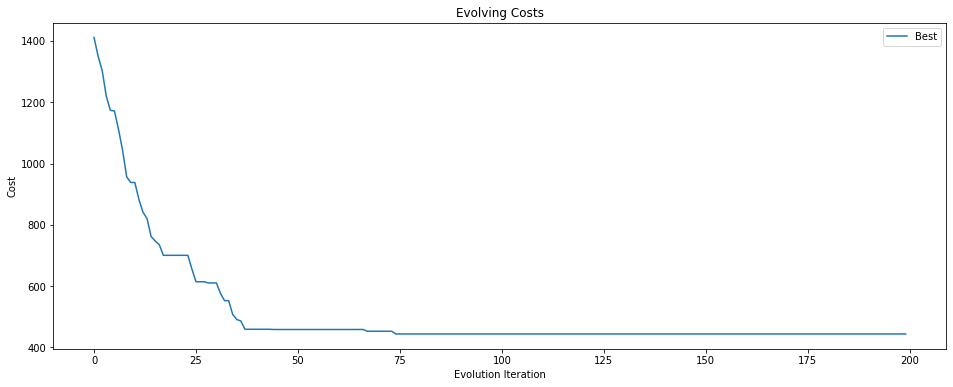

In [9]:
# Plotting a the trend of best values from each iteration of Evolution
# This plot uses averages of %s of the range to try neaten up the line



fig, ax = plt.subplots(figsize=(16,6))
plt.plot(run, dist)
plt.title("Evolving Costs")
ax.set_ylabel('Cost')
ax.set_xlabel('Evolution Iteration')
# ax1.set_ylabel('volts')
ax.legend(('Best', 'Mean', 'Worst'))
plt.show()


In [10]:
# display(vehicles)
print('Total Distance:', sum([route_dist(vehicles[v]['stores'], vehicles[v]['depot']) for v in vehicles]))

Total Distance: 444.04805026183215


In [11]:
# Creating labels for delivery route map

labels = [x+1 for x in range(23)] + ['W1'] + ['W2']
print(labels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'W1', 'W2']


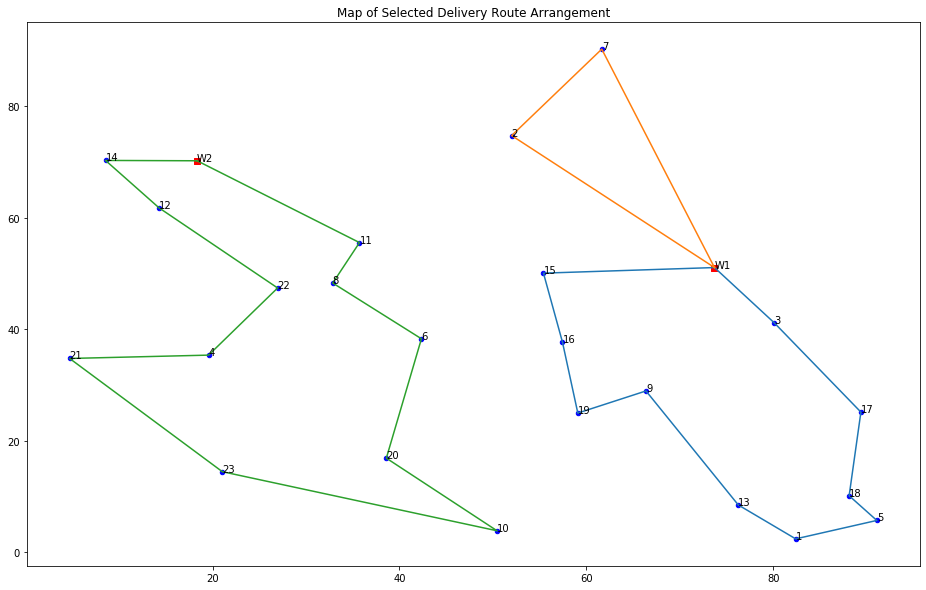

In [12]:
# Delivery route map

fig, ax = plt.subplots(figsize=(16,10))
plt.title("Map of Selected Delivery Route Arrangement")
# plt.plot(*zip(*_vertices), '-r')

for v in vehicles:
    g = vehicles[v]['depot']+vehicles[v]['stores']+vehicles[v]['depot']
    plt.plot(*zip(*g))    

plt.scatter(*zip(*master_coordinates[:23]), c="b", s=20, marker="o")
plt.scatter(*zip(*master_coordinates[23:]), c="r", s=40, marker="s")
for i in range(len(labels)):
    plt.annotate(labels[i], master_coordinates[i])
plt.show()

# Pass Two: Allowing different start and end depots

A new route cost calc is setup to account for different start and end points

In [13]:
def route_dist_trans(start_depot, stores, end_depot):
    '''Calculates the distance of a delivery route by calculating the distance from a distribution centre, to
    each delivery location, and back
    Allows to different start and end points'''

    w = start_depot+stores+end_depot
    
    dist = sum([dist_calc(w[s],w[s-1]) for s in range(1,len(w))])


    return dist

In [14]:
# set up initial vehicles trying to allow vehicles to move from one depot to the next
vehicles = {}

for n in range(len(store_coordinates)):
    vehicles[n] = {'stores':[store_coordinates[n]]}

for n in vehicles:
    if route_dist_trans([depot_coordinates[0]],vehicles[n]['stores'],[depot_coordinates[0]]) < route_dist_trans([depot_coordinates[1]],vehicles[n]['stores'],[depot_coordinates[1]]):
        vehicles[n]['start_depot'] = [depot_coordinates[0]]
        vehicles[n]['end_depot'] = [depot_coordinates[0]]
    else:
        vehicles[n]['start_depot'] = [depot_coordinates[1]]
        vehicles[n]['end_depot'] = [depot_coordinates[1]]

In [15]:
# trying to allow vehicles to move from one depot to the next


run = []
dist = []

for k in range(200):
    start = sum([route_dist_trans(vehicles[v]['start_depot'], vehicles[v]['stores'], vehicles[v]['end_depot']) for v in vehicles])
    # 1. pick a vehicle at random:
    veh = random.choice(list(vehicles.keys()))

    # 2. calculate distance travelled by chosen vehicle: 
    # maybe not needed
    d1 = route_dist_trans(vehicles[veh]['start_depot'], vehicles[veh]['stores'], vehicles[veh]['end_depot'])

    # 3. pick a visted store at random:
    store_index = random.randrange(len(vehicles[veh]['stores']))
    tested_store = vehicles[veh]['stores'].pop(store_index) 
    
    # 3.5 check what'll cost to just add that store back into place
    d2 = route_dist_trans(vehicles[veh]['start_depot'], vehicles[veh]['stores'], vehicles[veh]['end_depot'])
    dd = d1-d2

    # 4. Add empty vehicles for consideration:
    vehicles['a'] = {'stores':[],'start_depot':[depot_coordinates[0]], 'end_depot':[depot_coordinates[0]]}
    vehicles['b'] = {'stores':[], 'start_depot':[depot_coordinates[1]], 'end_depot':[depot_coordinates[1]]}

    # 5. test other locations:
    best_cost = dd
    best_v = veh
    best_i = store_index
    best_e = depot_coordinates.index(vehicles[veh]['end_depot'][0])

    for v in vehicles:
        for i in range(len(vehicles[v]['stores'])):
            ephemeral = vehicles[v]['stores'].copy()
            ephemeral.insert(i,tested_store)
            rc = (route_dist_trans(vehicles[v]['start_depot'], ephemeral, vehicles[v]['end_depot'])
                  -route_dist_trans(vehicles[v]['start_depot'], vehicles[v]['stores'], vehicles[v]['end_depot']))
            if rc < best_cost:
                best_cost = rc
                best_v = v
                best_i = i
                best_e = depot_coordinates.index(vehicles[v]['end_depot'][0])
                
        i = len(vehicles[v]['stores'])+1
        ephemeral = vehicles[v]['stores'].copy()
        ephemeral.insert(i,tested_store)
        for e in range(2):
            rc = (route_dist_trans(vehicles[v]['start_depot'], ephemeral, [depot_coordinates[e]])
                  -route_dist_trans(vehicles[v]['start_depot'], vehicles[v]['stores'], vehicles[v]['end_depot']))
            if rc < best_cost:
                best_cost = rc
                best_v = v
                best_i = i
                best_e = e         
            
        
                
    # 6. put store in best location:
    vehicles[best_v]['stores'].insert(best_i,tested_store)
    vehicles[best_v]['end_depot'] = [depot_coordinates[best_e]]                                   
                                     

    # 7. delete vehicles which visit no stores:
    tbd = [v for v in vehicles if len(vehicles[v]['stores']) == 0]

    for v in tbd:
        del vehicles[v]
    
    # 8.
    run.append(k)
    dist.append(sum([route_dist_trans(vehicles[v]['start_depot'], vehicles[v]['stores'], vehicles[v]['end_depot']) for v in vehicles]))
   # print(k, sum([route_dist(vehicles[v]['stores'], vehicles[v]['depot']) for v in vehicles]))
                
#     end = sum([route_dist(vehicles[v]['stores'], vehicles[v]['depot']) for v in vehicles])
#     if start-end < 0:
#         print(vehicles, '\n', veh, store_index, tested_store, best_v, best_i, start, end)
                
                
    
    

# display(vehicles)

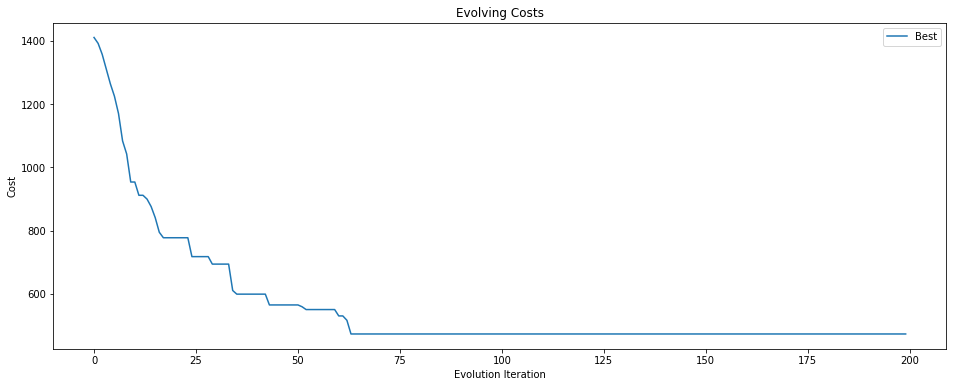

In [16]:
# Plotting a the trend of best values from each iteration of Evolution
# This plot uses averages of %s of the range to try neaten up the line



fig, ax = plt.subplots(figsize=(16,6))
plt.plot(run, dist)
plt.title("Evolving Costs")
ax.set_ylabel('Cost')
ax.set_xlabel('Evolution Iteration')
# ax1.set_ylabel('volts')
ax.legend(('Best', 'Mean', 'Worst'))
plt.show()


In [17]:
# display(vehicles)
print('Total Distance:', sum([route_dist_trans(vehicles[v]['start_depot'],vehicles[v]['stores'], vehicles[v]['end_depot']) for v in vehicles]))

Total Distance: 472.7168961038609


In [18]:
# Creating labels for delivery route map

labels = [x+1 for x in range(23)] + ['W1'] + ['W2']
print(labels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'W1', 'W2']


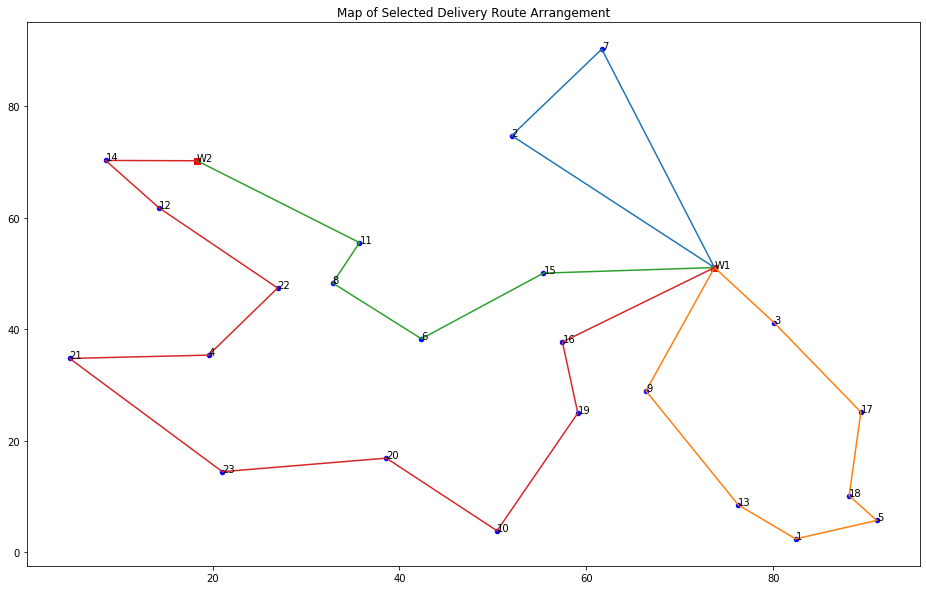

In [19]:
# Delivery route map

fig, ax = plt.subplots(figsize=(16,10))
plt.title("Map of Selected Delivery Route Arrangement")
# plt.plot(*zip(*_vertices), '-r')

for v in vehicles:
    g = vehicles[v]['start_depot']+vehicles[v]['stores']+vehicles[v]['end_depot']
    plt.plot(*zip(*g))    

plt.scatter(*zip(*master_coordinates[:23]), c="b", s=20, marker="o")
plt.scatter(*zip(*master_coordinates[23:]), c="r", s=40, marker="s")
for i in range(len(labels)):
    plt.annotate(labels[i], master_coordinates[i])
plt.show()

# Restricting Vehicle Capacity and Accounting for Cost

In [20]:
def route_cost_trans(start_depot, stores, end_depot, pd_cost):
    '''Calculates the distance of a delivery route by calculating the distance from a distribution centre, to
    each delivery location, and back
    Allows to different start and end points'''

    w = start_depot+stores+end_depot
    
    cost = sum([dist_calc(w[s],w[s-1])*pd_cost for s in range(1,len(w))])


    return cost

In [21]:
def fleet_setup(no_vans, no_lorries):
    '''Creating a fleet of capacity restricted vehicles'''
    
    vehicles = {}
    
    for n in range(0,no_vans):
        vehicles[n] = {'capacity':5, 'cost':1, 'stores':[], 'start_depot': [], 'end_depot': []}
    for n in range(no_vans,no_vans+no_lorries):
        vehicles[n] = {'capacity':14, 'cost':4, 'stores':[], 'start_depot': [], 'end_depot': []}
    
    return vehicles
    

In [22]:
def route_initalization(fleet, store_cords, depot_cords):
    '''Randomly assigns stores to available delivery vehicles'''
    
    
    for s in store_cords:
        options = [v for v in fleet if len(fleet[v]['stores'])<fleet[v]['capacity']]
        v = random.choice(options)
        fleet[v]['stores'].append(s)
    
    for v in fleet:
        fleet[v]['end_depot'].append(depot_cords[random.randrange(len(depot_cords))])
        fleet[v]['start_depot'].append(depot_cords[random.randrange(len(depot_cords))])
        
    return fleet
      

In [23]:
def route_change_options(fleet, depot_cords):
    
    '''Considers options for '''  
    
    target_options = [v for v in fleet if len(fleet[v]['stores'])>0]
    original_vehicle = random.choice(target_options)    
    migrant_index = random.randrange(len(fleet[original_vehicle]['stores']))
    migrant_store = fleet[original_vehicle]['stores'].pop(migrant_index)
    
    costs = []
    
    fleeting = copy.deepcopy(fleet)
    
    vehicle_options = [v for v in fleet if len(fleet[v]['stores'])<fleet[v]['capacity']]
    
    for v in vehicle_options:
        for i in range(len(fleet[v]['stores'])+1):
            if i == 0:
                for s in range(len(depot_cords)):
                    e = depot_cords.index(fleeting[v]['end_depot'][0])
                    
                    fleet[v]['start_depot'] = [depot_cords[s]]
                    fleet[v]['stores'].insert(i,migrant_store)
                    
                    costs.append((sum([route_dist_trans(fleet[v]['start_depot'],fleet[v]['stores'], fleet[v]['end_depot'])
                                     for v in fleet]), s, v, i, e))
                    
                    fleet[v]['start_depot'] = fleeting[v]['start_depot']
                    fleet[v]['stores'].pop(i)
                    
            elif i == len(fleet[v]['stores'])+1:
                for e in range(len(depot_cords)):
                    s = depot_cords.index(fleeting[v]['start_depot'][0])
                    
                    fleet[v]['end_depot'] = [depot_cords[e]]
                    fleet[v]['stores'].insert(i,migrant_store)
                    
                    costs.append((sum([route_dist_trans(fleet[v]['start_depot'],fleet[v]['stores'], fleet[v]['end_depot'])
                                     for v in fleet]), s, v, i, e))
                    
                    fleet[v]['stores'].pop(i)
                    fleet[v]['end_depot'] = fleeting[v]['end_depot']
                         
            else:
                s = depot_cords.index(fleeting[v]['start_depot'][0])
                e = depot_cords.index(fleeting[v]['end_depot'][0])
                
                fleet[v]['stores'].insert(i,migrant_store)
                    
                costs.append((sum([route_dist_trans(fleet[v]['start_depot'],fleet[v]['stores'], fleet[v]['end_depot'])
                                     for v in fleet]), s, v, i, e))
                    
                fleet[v]['stores'].pop(i)
                        
    cost, s, v, i, e = min(costs)
    
    fleet[v]['start_depot'] = [depot_cords[s]]                    
    fleet[v]['stores'].insert(i,migrant_store)
    fleet[v]['end_depot'] = [depot_cords[e]]         
                                               
    return fleet, cost, costs, migrant_store,s, v, i, e
      

In [24]:
#intializing feel and delivery route
vehicles = route_initalization(fleet_setup(2,2), store_coordinates, depot_coordinates)

run = []
dist = []


print(dist, '\n')
# display(vehicles)    

[] 



In [25]:
fleet_list = []
stores_list = []
ov_list = []
mi_list = []
costs_list = []
for n in range(100):
    vehicles, best, costs, moved_stores, o_s, o_v, o_i, o_e = route_change_options(vehicles, depot_coordinates)
    a = copy.deepcopy(vehicles)
    run.append(n)
    dist.append(best)
    fleet_list.append(a)
    stores_list.append(moved_stores)
    costs_list.append(costs)
#     ov_list.append(o_v)
#     mi_list.append(s_i)


# display(dist)


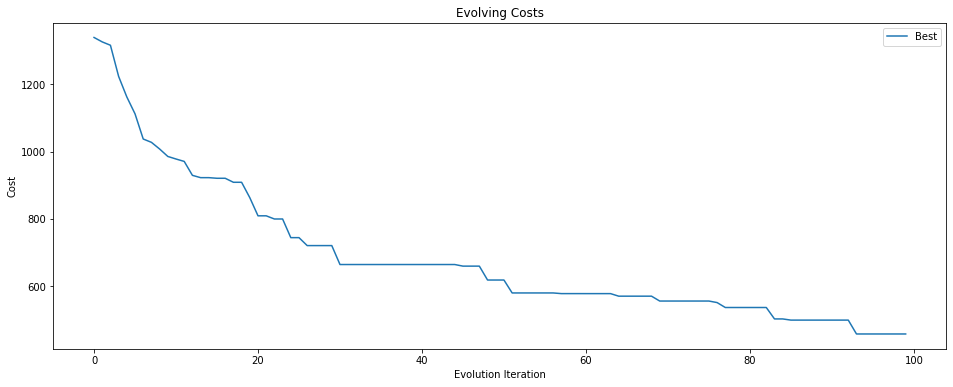

In [26]:
# Plotting a the trend of best values from each iteration of Evolution
# This plot uses averages of %s of the range to try neaten up the line



fig, ax = plt.subplots(figsize=(16,6))
plt.plot(run, dist)
plt.title("Evolving Costs")
ax.set_ylabel('Cost')
ax.set_xlabel('Evolution Iteration')
# ax1.set_ylabel('volts')
ax.legend(('Best', 'Mean', 'Worst'))
plt.show()


In [39]:
print('Final Cost is', dist[-1])

Final Cost is 457.76542069064595


In [40]:
# Looks like this may not be done improving

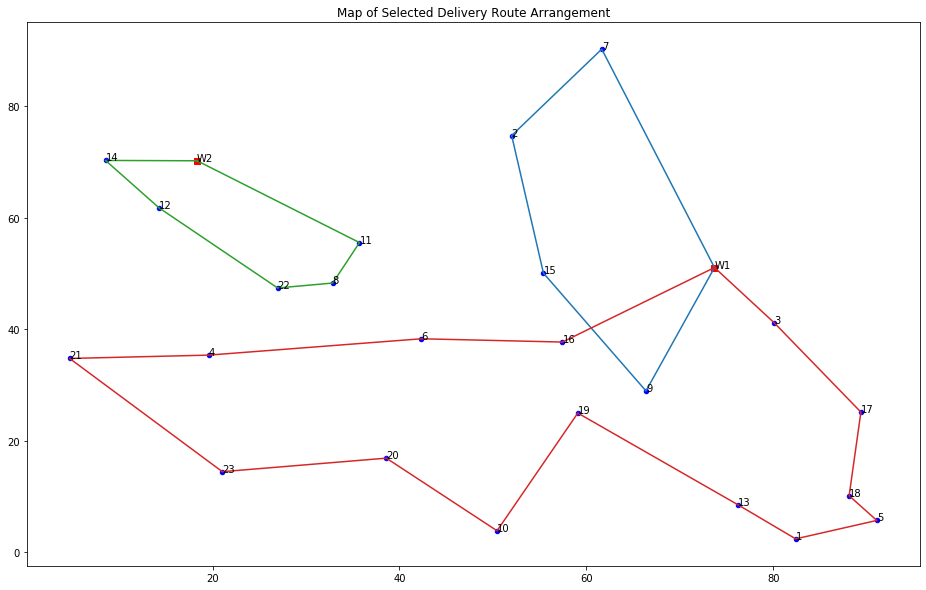

In [27]:
# Delivery route map

fig, ax = plt.subplots(figsize=(16,10))
plt.title("Map of Selected Delivery Route Arrangement")
# plt.plot(*zip(*_vertices), '-r')

for v in vehicles:
    g = vehicles[v]['start_depot']+vehicles[v]['stores']+vehicles[v]['end_depot']
    plt.plot(*zip(*g))    

plt.scatter(*zip(*master_coordinates[:23]), c="b", s=20, marker="o")
plt.scatter(*zip(*master_coordinates[23:]), c="r", s=40, marker="s")
for i in range(len(labels)):
    plt.annotate(labels[i], master_coordinates[i])
plt.show()

Come back to this and maybe run a for loop considering a handful of specific fleet setups

# Genetic Algorithm

In [28]:
def costs_weight(costs_list):
    '''calculates weighting assuming a costs list in the format [(cost,...), ...]'''
    
    costs = [e[0] for e in costs_list]
    
    mn_cost = min(costs)
    mx_cost = max(costs)
    
    if mn_cost == mx_cost:
        weights = [1 for n in range(len(costs))]
    else:
        weights = [(x-mn_cost)/(mx_cost-mn_cost) for x in costs]
        
    return weights

In [29]:
def route_change_options_GA(fleet, depot_cords):
    
    '''Considers options for '''  
    
    target_options = [v for v in fleet if len(fleet[v]['stores'])>0]
    original_vehicle = random.choice(target_options)    
    migrant_index = random.randrange(len(fleet[original_vehicle]['stores']))
    migrant_store = fleet[original_vehicle]['stores'].pop(migrant_index)
    
    costs = []
    
    fleeting = copy.deepcopy(fleet)
    
    vehicle_options = [v for v in fleet if len(fleet[v]['stores'])<fleet[v]['capacity']]
    
    for v in vehicle_options:
        for i in range(len(fleet[v]['stores'])+1):
            if i == 0:
                for s in range(len(depot_cords)):
                    e = depot_cords.index(fleeting[v]['end_depot'][0])
                    
                    fleet[v]['start_depot'] = [depot_cords[s]]
                    fleet[v]['stores'].insert(i,migrant_store)
                    
                    costs.append((sum([route_cost_trans(fleet[v]['start_depot'],fleet[v]['stores'], fleet[v]['end_depot'], fleet[v]['cost'])
                                     for v in fleet]), s, v, i, e))
                    
                    fleet[v]['start_depot'] = fleeting[v]['start_depot']
                    fleet[v]['stores'].pop(i)
                    
            elif i == len(fleet[v]['stores'])+1:
                for e in range(len(depot_cords)):
                    s = depot_cords.index(fleeting[v]['start_depot'][0])
                    
                    fleet[v]['end_depot'] = [depot_cords[e]]
                    fleet[v]['stores'].insert(i,migrant_store)
                    
                    costs.append((sum([route_cost_trans(fleet[v]['start_depot'],fleet[v]['stores'], fleet[v]['end_depot'], fleet[v]['cost'])
                                     for v in fleet]), s, v, i, e))
                    
                    fleet[v]['stores'].pop(i)
                    fleet[v]['end_depot'] = fleeting[v]['end_depot']
                         
            else:
                s = depot_cords.index(fleeting[v]['start_depot'][0])
                e = depot_cords.index(fleeting[v]['end_depot'][0])
                
                fleet[v]['stores'].insert(i,migrant_store)
                    
                costs.append((sum([route_cost_trans(fleet[v]['start_depot'],fleet[v]['stores'], fleet[v]['end_depot'], fleet[v]['cost'])
                                     for v in fleet]), s, v, i, e))
                    
                fleet[v]['stores'].pop(i)
                        
    cost, s, v, i, e = random.choices(costs, weights=costs_weight(costs))[0]
    
    fleet[v]['start_depot'] = [depot_cords[s]]                    
    fleet[v]['stores'].insert(i,migrant_store)
    fleet[v]['end_depot'] = [depot_cords[e]]         
                                               
    return fleet, cost
      

In [30]:
def fleet_setup(no_vans, no_lorries):
    '''Creating a fleet of capacity restricted vehicles'''
    
    vehicles = {}
    
    for n in range(0,no_vans):
        vehicles[n] = {'capacity':5, 'cost':1, 'stores':[], 'start_depot': [], 'end_depot': []}
    for n in range(no_vans,no_vans+no_lorries):
        vehicles[n] = {'capacity':14, 'cost':4, 'stores':[], 'start_depot': [], 'end_depot': []}
    
    return vehicles
    

In [31]:
def route_initalization(fleet, store_cords, depot_cords):
    '''Randomly assigns stores to available delivery vehicles'''
    
    
    for s in store_cords:
        options = [v for v in fleet if len(fleet[v]['stores'])<fleet[v]['capacity']]
        v = random.choice(options)
        fleet[v]['stores'].append(s)
    
    for v in fleet:
        fleet[v]['end_depot'].append(depot_cords[random.randrange(len(depot_cords))])
        fleet[v]['start_depot'].append(depot_cords[random.randrange(len(depot_cords))])
        
    return fleet
      

In [32]:
def LiamsGA(pop, it):
    '''Will run the population 'pop' through 'it' iterations of evolution and selection'''
    
    # Lists of the best, worst, and mean scores for analysis later
    best_als = []
    mean_als = []
    worst_als = []
    
    
    for y in range(it):

        costs = [pop[i][0] for i in range(len(pop))]
        worst =  max(costs)
        best = min(costs)
        mean = np.mean(costs)

        best_als.append(best)
        mean_als.append(mean)
        worst_als.append(worst)
                  
        pop = sorted(pop, key=itemgetter(0), reverse = False)
        
        weights = costs_weight(pop[:edge_survivor])
        for i in range(len(weights)):
            pop[i][1] = weights[i]

        for i in range(edge_survivor,len(population)):
            j = rnd.choices(range(edge_survivor),weights)
            k = route_change_options_GA(pop[j[0]][2], depot_coordinates)
            pop[i][2] = copy.deepcopy(k[0])
            pop[i][0] = copy.deepcopy(k[1])
            
            route_change_options_GA
        
    return(pop, best_als, mean_als, worst_als)


In [33]:
# Hyperparameters for GeneticAlgorithm

pop_size = 1000
cull_rate = 0.5
its = 1000
edge_survivor = int((1-cull_rate)*pop_size)

In [34]:
#Create a population by creating a model entry and then copying 'po' times
# making this a list of [cost, weight, vehicle]

population = []

for i in range(pop_size):
    j = route_change_options_GA(route_initalization(fleet_setup(6,3), store_coordinates, depot_coordinates),
                                depot_coordinates)
    population.append([copy.deepcopy(j[1]), 0, copy.deepcopy(j[0])])


In [35]:
# ACTUALLY RUNNING THE GENETIC ALGORITHM

start = time.time()

f_pop, best_als, mean_als, worst_als = LiamsGA(population, its)

end = time.time()
print('Execution time (s): ', end - start)

Execution time (s):  4688.06335234642


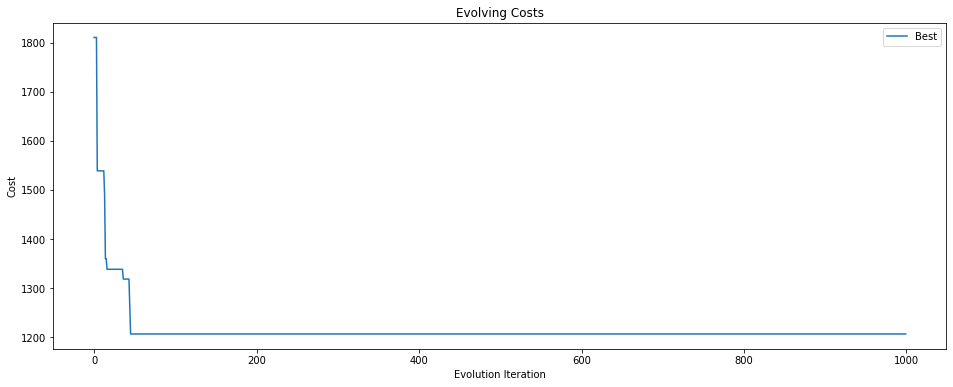

In [36]:
# Plotting a the trend of best values from each iteration of Evolution
# This plot uses averages of %s of the range to try neaten up the line



fig, ax = plt.subplots(figsize=(16,6))
plt.plot([x for x in range(its)], best_als)
plt.title("Evolving Costs")
ax.set_ylabel('Cost')
ax.set_xlabel('Evolution Iteration')
# ax1.set_ylabel('volts')
ax.legend(('Best', 'Mean', 'Worst'))
plt.show()


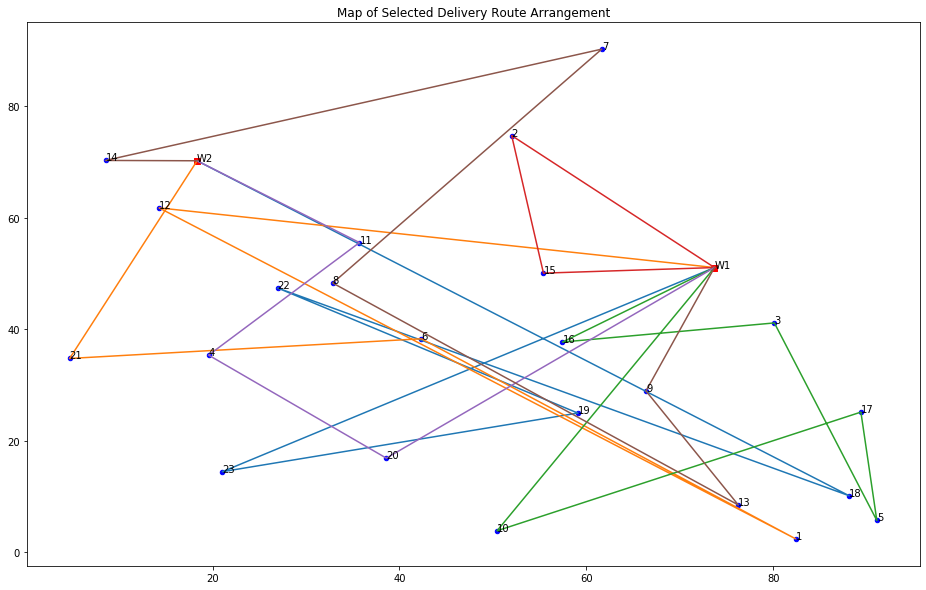

In [37]:
# Delivery route map

fleet = f_pop[0][2]

fig, ax = plt.subplots(figsize=(16,10))
plt.title("Map of Selected Delivery Route Arrangement")
# plt.plot(*zip(*_vertices), '-r')

for v in fleet:
    g = fleet[v]['start_depot']+fleet[v]['stores']+fleet[v]['end_depot']
    plt.plot(*zip(*g))    

plt.scatter(*zip(*master_coordinates[:23]), c="b", s=20, marker="o")
plt.scatter(*zip(*master_coordinates[23:]), c="r", s=40, marker="s")
for i in range(len(labels)):
    plt.annotate(labels[i], master_coordinates[i])
plt.show()

In [38]:
#printing in format for latex

# for r in solutions:
#     print(r[0], "&", r[1], "&", r[2], "&", r[3], "&", r[4], "\\\\")

NameError: name 'solutions' is not defined